# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [12]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

<AxesSubplot:>

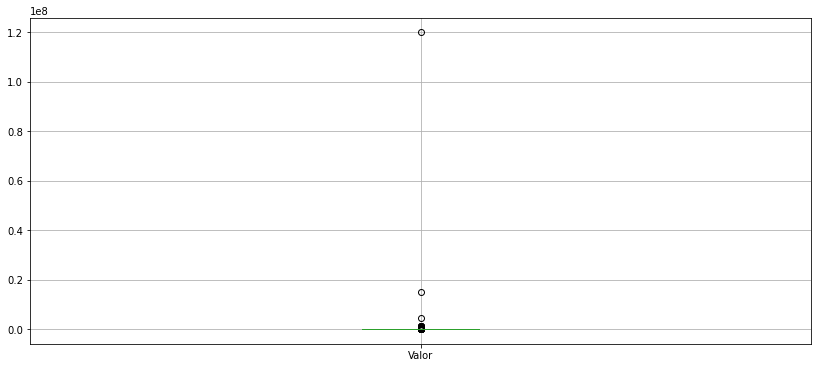

In [13]:
dados.boxplot(['Valor'])

In [14]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
810,Conjunto Comercial/Sala,Barra da Tijuca,0,0,0,5124,614000.0,0.0,0.0,119.828259,Apartamento
866,Conjunto Comercial/Sala,Botafogo,0,56,0,4235,529375.0,114599.0,34345.0,125.000000,Apartamento
1142,Conjunto Comercial/Sala,Cidade Nova,0,47,0,7357,514990.0,166709.0,14787.0,70.000000,Apartamento
2666,Conjunto Comercial/Sala,Centro,0,15,0,5666,530000.0,1.0,1.0,93.540417,Apartamento
2931,Prédio Inteiro,Barra da Tijuca,0,40,0,7500,600000.0,162000.0,13350.0,80.000000,Apartamento
4499,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,15000000.0,0.0,1000.0,13636.363636,Apartamento
4532,Prédio Inteiro,Centro,0,0,0,6986,560000.0,0.0,0.0,80.160321,Apartamento
5448,Conjunto Comercial/Sala,Centro,0,30,0,4940,612550.0,128440.0,0.0,123.997976,Apartamento
5474,Prédio Inteiro,Jacarepaguá,0,15,0,1200,120000000.0,0.0,10000.0,100000.000000,Apartamento
7889,Prédio Inteiro,Centro,0,90,0,7774,505310.0,0.0,0.0,65.000000,Apartamento


In [15]:
valor = dados['Valor']

In [19]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [20]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

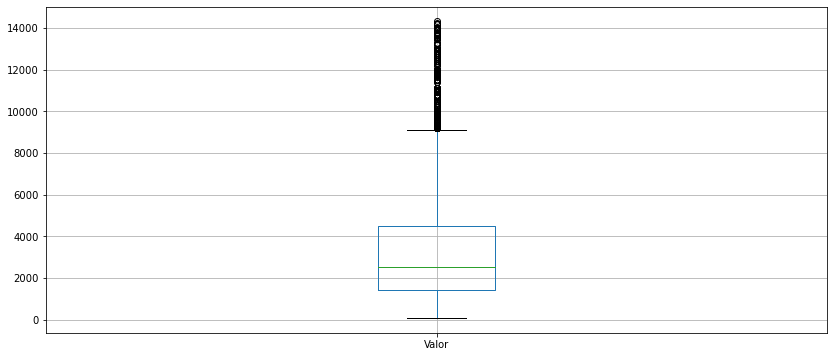

In [21]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

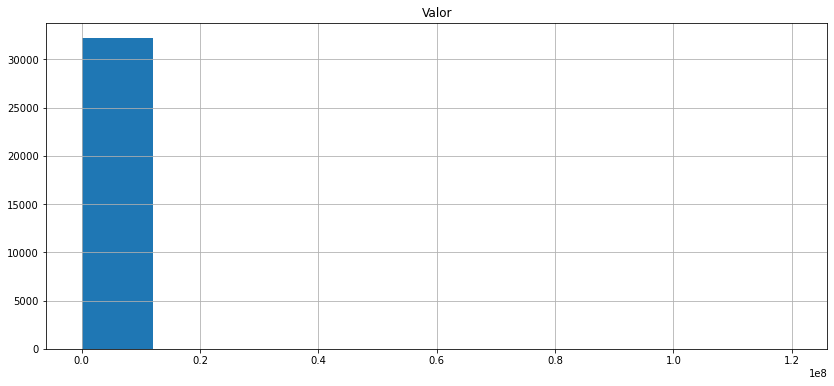

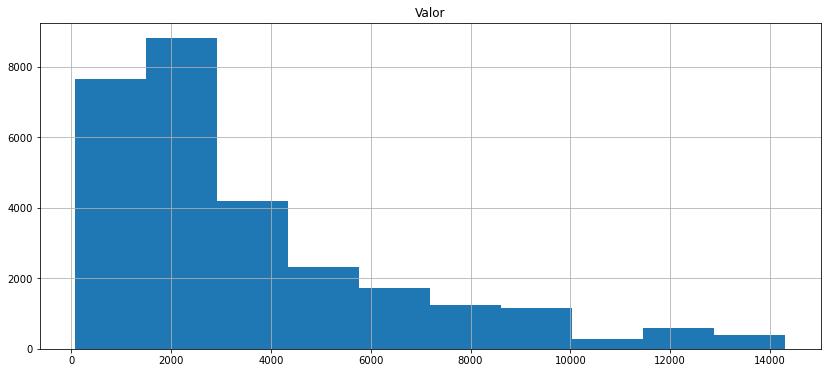

In [22]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Exercício

In [23]:
dados_amostra = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')

In [24]:
valor_amostra_m2 = dados_amostra['Valor m2']

In [25]:
valor_amostra_m2

0       10.00
1       13.56
2       51.02
3       55.55
4       18.46
        ...  
9995    96.88
9996    31.58
9997    40.00
9998    34.00
9999     8.33
Name: Valor m2, Length: 10000, dtype: float64

In [27]:
Q1 = valor_amostra_m2.quantile(.25)
Q3 = valor_amostra_m2.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [28]:
limite_inferior

-10.340000000000003

In [29]:
limite_superior

73.9